# Little Fourier Transformation

If the size of Fourier transformation is very small, say 4 or 8, what do the bases look like? 

More specificly, direct DFT is defined as

$$
A_k = \sum_{m=0}^{N-1}a_m e^{-2 \pi i \frac{mk}{N}},\quad k=0,...,N-1
$$

and inverse DFT is defined as

$$
a_m = \frac{1}{N}\sum_{k=0}^{N-1}A_k e^{2 \pi i \frac{mk}{N}},\quad m=0,...,N-1
$$

let $N=4$, we want to see the shapes of $e^{2 \pi i \frac{mk}{N}}$ along $m$ for $k=0,1,2,3$.

Let $A_k=\delta_k^l$ for $l=0,1,2,3$, then inverse DFT for a given $l=0,1,2,3$ is

\begin{equation}
a_m = \frac{1}{n}\sum_{k=0}^{N-1}\delta_k^l e^{2 \pi i \frac{mk}{N}},\quad m=0,...,N-1 \\
= \frac{1}{N}e^{2 \pi i \frac{ml}{N}},\quad m=0,...,n-1
\end{equation}

So we only need to calculate the inverse DFT of various $\delta$-functions for $l=0,1,2,3$ to get the shapes of the bases

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# some first class functions for convenience
fft = np.fft.fft
ifft = np.fft.ifft
fftshift = np.fft.fftshift
ifftshift = np.fft.ifftshift
fft2 = np.fft.fft2
ifft2 = np.fft.ifft2

## One Dimension

In [149]:
# assume we have a spike in frequence domain with length 4
n = 4
# we generate n spikes at diffrence frequencies, 
# note the first axis which is the same as matlab first dimension, is 
# the frequency dimension, the 2nd axis is for the different spike locations
fdata = np.diag(np.ones((n,)))
tdata = ifftshift(ifft(ifftshift(fdata, axes=0), axis=0), axes=0)
tdata

array([[ 0.25+0.j  , -0.25+0.j  ,  0.25+0.j  , -0.25+0.j  ],
       [-0.25+0.j  ,  0.00+0.25j,  0.25+0.j  ,  0.00-0.25j],
       [ 0.25+0.j  ,  0.25+0.j  ,  0.25+0.j  ,  0.25+0.j  ],
       [-0.25+0.j  ,  0.00-0.25j,  0.25+0.j  ,  0.00+0.25j]])

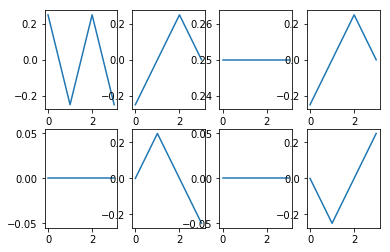

In [150]:
for ii in range(0,n):
    plt.subplot(2, n, ii+1)
    # plot the iith time domain real data
    plt.plot(range(0,n), tdata[::,ii].real)
    plt.subplot(2, n, n+ ii+1)
    # plot the iith time domain imag data
    plt.plot(range(0,n), tdata[::,ii].imag)
plt.show()


The above figures diplay the real and imag parts (two rows) of the bases for $l$ (columns)

## Two Dimension

In [151]:
a = np.array(range(6)); print(a)
np.reshape(a, (2,3), order='F')

[0 1 2 3 4 5]


array([[0, 2, 4],
       [1, 3, 5]])

In [152]:
# assume we have a spike in 2D kspace domain with shape (4,4)
n = 4
kdata = np.diag(np.ones((n*n,)))
kdata = np.reshape(kdata, (n,n,n*n), order='F')
imdata = ifftshift(ifft2(ifftshift(kdata, axes=(0,1)), axes=(0,1)), axes=(0,1))

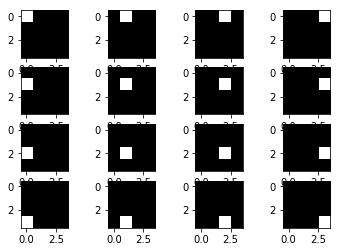

In [159]:
# make sure import data is good
for ii in range(n*n):
    plt.subplot(n,n, ii%n*n+np.floor(ii/n)+1)
    plt.imshow(kdata[:,:,ii], cmap='gray')
plt.show()

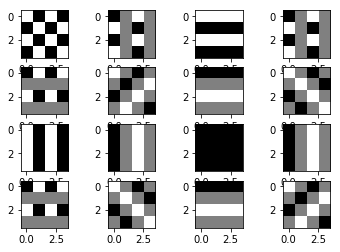

In [161]:
# real image data
for ii in range(n*n):
    plt.subplot(n,n, ii%n*n+np.floor(ii/n)+1)
    plt.imshow(imdata[:,:,ii].real, cmap='gray')
plt.show()

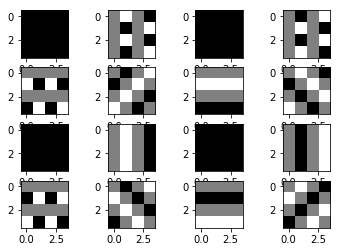

In [158]:
# imag image data
for ii in range(n*n):
    plt.subplot(n,n, ii%n*n+np.floor(ii/n)+1)
    plt.imshow(imdata[:,:,ii].imag, cmap='gray')
plt.show()

The above figures diplay the real and imag parts (two rows) of the bases for $l$ (columns)